In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import lightgbm

In [3]:
df=pd.read_csv('labeled_data2.csv')

In [4]:
df

,Unnamed: 0,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwe_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
0,0,10.215.173.1,157.240.16.32,48924,443,6,2021-09-15 15:33:24,2525190.0,2094.495860,8.316206,...,0.000000,0.000000,126.400000,365.909091,0,10,11,1264,4025,benign
1,1,10.215.173.1,10.215.173.2,16658,53,17,2021-09-15 15:33:24,43626.0,4148.902031,45.844221,...,0.000000,0.000000,68.000000,113.000000,0,1,1,68,113,benign
2,2,10.215.173.1,157.240.16.53,37292,5222,6,2021-09-15 15:33:24,2504540.0,735.065122,9.183323,...,71225.071225,0.000000,70.454545,88.833333,0,11,12,775,1066,benign
3,3,192.168.101.162,172.217.160.162,39604,443,17,2021-09-15 15:33:24,270572.0,1075.499313,18.479370,...,0.000000,0.000000,61.666667,53.000000,0,3,2,185,106,benign
4,4,10.215.173.1,192.168.101.238,44848,53,17,2021-09-15 15:33:24,230191.0,981.793380,8.688437,...,0.000000,0.000000,77.000000,149.000000,0,1,1,77,149,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,54961,10.215.173.1,10.215.173.2,31355,53,17,2021-09-15 15:58:50,134195.0,1468.012966,14.903685,...,0.000000,0.000000,70.000000,127.000000,0,1,1,70,127,benign
54962,54962,10.215.173.1,10.215.173.2,37070,53,17,2021-09-15 15:58:50,136412.0,1187.578805,14.661467,...,0.000000,0.000000,73.000000,89.000000,0,1,1,73,89,benign
54963,54963,10.215.173.1,142.250.192.98,47991,443,17,2021-09-15 15:58:50,296628.0,31719.864612,57.310841,...,347594.111254,0.000000,649.250000,468.333333,0,8,9,5194,4215,benign
54964,54964,10.215.173.1,10.215.173.2,37982,53,17,2021-09-15 15:58:51,163704.0,891.853589,12.217172,...,0.000000,0.000000,65.000000,81.000000,0,1,1,65,81,benign


In [5]:
df.columns

Index(['Unnamed: 0', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_c

In [6]:
ack = df['ack_flag_cnt']
pd.unique(ack)

array([0], dtype=int64)

In [7]:
init = df['init_fwd_win_byts']
pd.unique(init)

array([65535,     0,  2048,  2546], dtype=int64)

In [8]:
seg = df['fwd_seg_size_min'].tolist()
pd.unique(seg)

array([20,  8])

In [9]:
iat = df['fwd_iat_tot']
pd.unique(iat)


array([ 582767.,       0.,  862174., ..., 1423555.,  238581.,  421291.])

In [10]:
flow = df['flow_duration']
pd.unique(flow)


array([2525190.,   43626., 2504540., ...,  296628.,  163704.,  570809.])

In [11]:
label = df['Label']
pd.unique(label)

array(['benign', 'attack'], dtype=object)

In [12]:
data = [df["ack_flag_cnt"], df["init_fwd_win_byts"],df["fwd_seg_size_min"], df["fwd_iat_tot"],df["flow_duration"], df["Label"]]

In [13]:
headers = ["ack", "init","seg","iat","flow","label"]

In [14]:
df1 = pd.concat(data, axis=1, keys=headers)

In [15]:
df1

,ack,init,seg,iat,flow,label
0,0,65535,20,582767.0,2525190.0,benign
1,0,0,8,0.0,43626.0,benign
2,0,65535,20,862174.0,2504540.0,benign
3,0,0,8,270572.0,270572.0,benign
4,0,0,8,0.0,230191.0,benign
...,...,...,...,...,...,...
54961,0,0,8,0.0,134195.0,benign
54962,0,0,8,0.0,136412.0,benign
54963,0,0,8,238581.0,296628.0,benign
54964,0,0,8,0.0,163704.0,benign


## Model Creation

In [16]:
#df1=pd.read_csv('labeled_data_attributes.csv')

In [17]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [18]:
# label encoding for Y values
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [19]:
pd.unique(df1['label'])
# 1 = Benign
# 0 = Attack

array([1, 0])

In [20]:
X = df1.drop('label',axis=1)
y = df1['label']

In [21]:
# train and test split from newly created dataset 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32, shuffle=True)

In [22]:
y_train.value_counts()

0    42848
1     1124
Name: label, dtype: int64

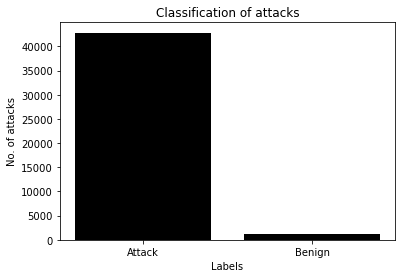

In [23]:
data = {'Attack':y_train.value_counts()[0], 'Benign':y_train.value_counts()[1]}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='black')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [24]:
# perform smote for the dataset to solve imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

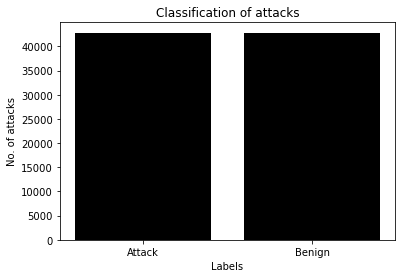

In [25]:
data = {'Attack':y_train.value_counts()[0], 'Benign':y_train.value_counts()[1]}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='black')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [26]:
y_train.value_counts()

1    42848
0    42848
Name: label, dtype: int64

In [27]:
# concatenate dataset for passing to pycaret
train_dataset = pd.concat([x_train,y_train],axis=1)
test_dataset = pd.concat([x_test,y_test],axis=1)

## Manual training

In [28]:
x_test.to_csv("x_test.csv")

In [29]:
y_test.to_csv("y_test.csv")

### Training Different Models

In [34]:
xgb = XGBClassifier(scale_pos_weight=1)
xgb_clf = xgb.fit(x_train,y_train)
predictions_xgb = xgb_clf.predict(x_test)

[21:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
cf_matrix_xgb = confusion_matrix(y_test, predictions_xgb)
print(cf_matrix_xgb)

[[10667    48]
 [    5   274]]


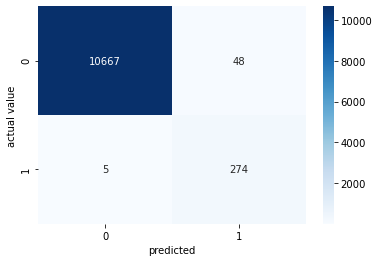

In [36]:
heatmap_xgb = sns.heatmap(cf_matrix_xgb, annot=True,cmap='Blues',fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual value")
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       0.85      0.98      0.91       279

    accuracy                           1.00     10994
   macro avg       0.93      0.99      0.95     10994
weighted avg       1.00      1.00      1.00     10994



In [38]:
print("xgb Score -> ",accuracy_score(predictions_xgb, y_test)*100)
print("xgb roc_auc Score -> ",roc_auc_score(y_test,predictions_xgb))
print("f1 score ->", f1_score(y_test,predictions_xgb))

xgb Score ->  99.51791886483537
xgb roc_auc Score ->  0.988799575846676
f1 score -> 0.9118136439267887


In [39]:
filename = "xgb_model.pkl"
pickle.dump(xgb_clf,open(filename,'wb'))

# ADA BOOST

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
ada = AdaBoostClassifier()
ada_clf = ada.fit(x_train,y_train)
predictions_ada = ada_clf.predict(x_test)

In [42]:
cf_matrix_ada = confusion_matrix(y_test, predictions_ada)
print(cf_matrix_ada)

[[10611   104]
 [    3   276]]


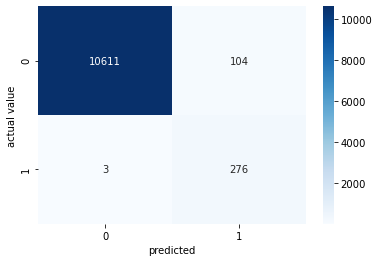

In [43]:
heatmap_ada = sns.heatmap(cf_matrix_ada, annot=True,cmap='Blues',fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual value")
plt.show()

In [44]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10715
           1       0.73      0.99      0.84       279

    accuracy                           0.99     10994
   macro avg       0.86      0.99      0.92     10994
weighted avg       0.99      0.99      0.99     10994



In [45]:
print("ada Score -> ",accuracy_score(predictions_ada, y_test)*100)
print("ada roc_auc Score -> ",roc_auc_score(y_test,predictions_ada))
print("ada f1 score ->", f1_score(y_test,predictions_ada))

ada Score ->  99.02674185919592
ada roc_auc Score ->  0.9897706461146317
ada f1 score -> 0.8376327769347497


In [46]:
filename = "ada_model.pkl"
pickle.dump(ada_clf,open(filename,'wb'))

# RF

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_clf = rf.fit(x_train,y_train)
predictions_rf = rf_clf.predict(x_test)

In [48]:
cf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print(cf_matrix_rf)

[[10668    47]
 [    6   273]]


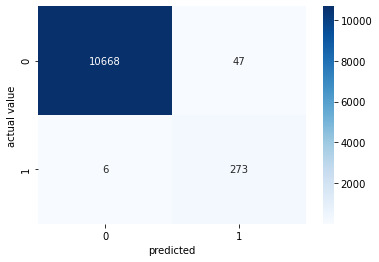

In [49]:
heatmap_rf = sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues',fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual value")
plt.show()

In [50]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       0.85      0.98      0.91       279

    accuracy                           1.00     10994
   macro avg       0.93      0.99      0.95     10994
weighted avg       1.00      1.00      1.00     10994



In [51]:
print("rf Score -> ",accuracy_score(predictions_rf, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_rf))
print("rf f1 score ->", f1_score(y_test,predictions_rf))

rf Score ->  99.51791886483537
rf roc_auc Score ->  0.9870541247070984
rf f1 score -> 0.9115191986644409


In [52]:
filename = "rf_model.pkl"
pickle.dump(rf_clf,open(filename,'wb'))

# LGBM

In [53]:
lgbm= lightgbm.LGBMClassifier()
lgbm_clf = lgbm.fit(x_train,y_train)
predictions_lgbm = lgbm_clf.predict(x_test)

In [54]:
cf_matrix_lgbm = confusion_matrix(y_test, predictions_lgbm)
print(cf_matrix_lgbm)

[[10626    89]
 [    7   272]]


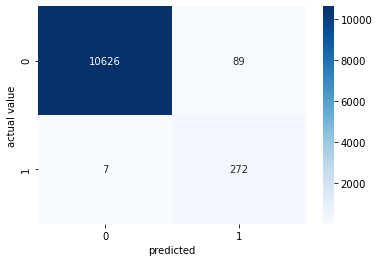

In [55]:
heatmap_lgbm = sns.heatmap(cf_matrix_lgbm, annot=True,cmap='Blues',fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual value")
plt.show()

In [56]:
print("rf Score -> ",accuracy_score(predictions_lgbm, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_lgbm))
print("rf f1 score ->", f1_score(y_test,predictions_lgbm))

rf Score ->  99.12679643441878
rf roc_auc Score ->  0.983302140669714
rf f1 score -> 0.85


In [57]:
filename = "lgbm_model.pkl"
pickle.dump(lgbm_clf,open(filename,'wb'))